<a href="https://colab.research.google.com/github/LK2705/AI-Projects-LAUNCHED/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [4]:
# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Drop missing rows
df.dropna(inplace=True)

# Filter out invalid rows
df = df[df['Quantity Ordered'].apply(lambda x: str(x).isdigit())]

# Convert datatypes
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Create new feature: Sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Extract time features
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

# Keep important columns
df = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour', 'Sales']]

df.head()


/tmp/ipython-input-1839381410.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


,Quantity Ordered,Price Each,Month,Hour,Sales
0,2,11.95,4,8,23.90
2,1,99.99,4,22,99.99
3,1,600.00,4,14,600.00
4,1,11.99,4,14,11.99
5,1,11.99,4,9,11.99


In [5]:
# Define input (X) and target (y)
X = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Initialize Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input + hidden layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Show model structure
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=32,
    verbose=1
)


Epoch 1/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 99123.5078 - mae: 152.8192 - val_loss: 578.1228 - val_mae: 15.5586
Epoch 2/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3105.4116 - mae: 26.7391 - val_loss: 396.3592 - val_mae: 9.8729
Epoch 3/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2472.3792 - mae: 23.6611 - val_loss: 215.4474 - val_mae: 6.1428
Epoch 4/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2813.8137 - mae: 21.8650 - val_loss: 177.7930 - val_mae: 4.6244
Epoch 5/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2152.6562 - mae: 21.0378 - val_loss: 646.3523 - val_mae: 16.8237
Epoch 6/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2347.8662 - mae: 21.4215 - val_loss: 184.1096 - val_mae: 6.2666
Epoch 7/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2104.9714 - mae: 19.8396 - val_loss: 366.7660 - val_mae: 10.1308
Epoch 8/80
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2456.7378 - mae: 20.3780 - val_loss: 151.2841 - val_mae: 5.9533
Epo

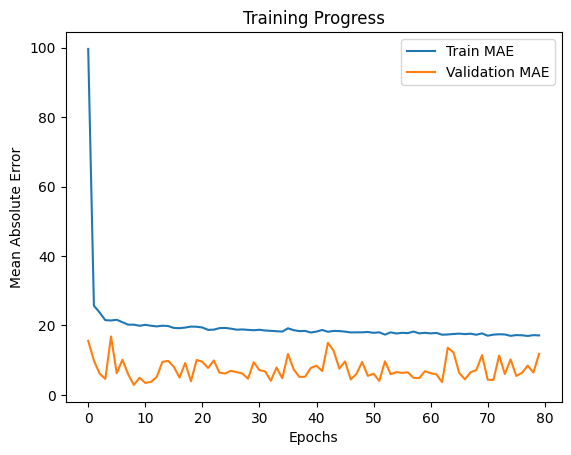

In [8]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()
